In [3]:
%pip install -U scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 4.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/11.0 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.0 MB 2.6 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.0 MB 2.9 MB/s eta 0:00:04
   ------------ --------------------------- 3.4/11.0 MB 3.3 MB/s eta 0:00:03
   ----------------- ---------------------- 4.7/11.0 MB 3.8 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.0 MB 3.8 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.0 MB 3.8 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.0 MB 3.9 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.0 MB 4.1 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/11.0 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 4.4 MB/s eta 0:00:01
   -

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Load your data 

employees = pd.read_csv('transformed_tables\Employees.csv')
skills = pd.read_csv('transformed_tables\Skills.csv')
employee_skill_proficiency = pd.read_csv('transformed_tables\EmployeeSkillProficiency.csv')

<>:3: SyntaxWarning: invalid escape sequence '\E'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\E'
<>:3: SyntaxWarning: invalid escape sequence '\E'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\E'
C:\Users\RishabhSaklani\AppData\Local\Temp\ipykernel_16372\1394537860.py:3: SyntaxWarning: invalid escape sequence '\E'
  employees = pd.read_csv('transformed_tables\Employees.csv')
C:\Users\RishabhSaklani\AppData\Local\Temp\ipykernel_16372\1394537860.py:4: SyntaxWarning: invalid escape sequence '\S'
  skills = pd.read_csv('transformed_tables\Skills.csv')
C:\Users\RishabhSaklani\AppData\Local\Temp\ipykernel_16372\1394537860.py:5: SyntaxWarning: invalid escape sequence '\E'
  employee_skill_proficiency = pd.read_csv('transformed_tables\EmployeeSkillProficiency.csv')


In [27]:
# Merge dataframes to create a comprehensive dataset
data = employees.merge(employee_skill_proficiency, on='empID')
data = data.merge(skills, on='skillID')


In [28]:
# Preprocess data (this is a simplified example)
data['proficiency'] = data['proficiency'].fillna(0)  # Fill missing proficiency with 0
X = data[['experience', 'skillID', 'proficiency']]  # Features
y = data['designation']  # Target variable

In [29]:
# Encode categorical variables
X = pd.get_dummies(X, columns=['skillID'])


In [71]:
X_train

,experience,proficiency,skillID_1,skillID_2,skillID_3,skillID_4,skillID_5,skillID_6,skillID_7,skillID_8,...,skillID_21,skillID_22,skillID_23,skillID_24,skillID_25,skillID_26,skillID_27,skillID_28,skillID_29,skillID_30
81,4,5,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
99,4,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119,6,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
12,2,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16,7,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,10,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
103,6,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
67,4,3,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
24,1,3,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [30]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [31]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# Make predictions
y_pred = model.predict(X_test)

In [33]:
# Evaluate the model
print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

  Principal Architect       0.80      1.00      0.89         4
    Software Engineer       0.77      0.83      0.80        12
 Solutions Consultant       0.33      0.33      0.33         3
    Solutions Enabler       0.00      0.00      0.00         3
Sr. Software Engineer       0.75      0.75      0.75         8

             accuracy                           0.70        30
            macro avg       0.53      0.58      0.55        30
         weighted avg       0.65      0.70      0.67        30



In [34]:
# Convert skillID to string
data['skillID'] = data['skillID'].astype(str)

# Generate skills matrix
data['predicted_designation'] = model.predict(X)
skills_matrix = data.groupby('predicted_designation')['skillID'].agg(lambda x: ', '.join(x.unique())).reset_index()
skills_matrix.columns = ['Designation', 'Skills']



In [48]:
skills_matrix.to_csv('designations.csv')


In [49]:
designations_df = pd.read_csv('designations.csv')

In [50]:
designations_df['Skills'] = designations_df['Skills'].apply(lambda x: [int(s) for s in x.split(', ')])


In [52]:
designations_exploded = designations_df.explode('Skills')

In [54]:
merged_df = designations_exploded.merge(skills, left_on='Skills', right_on='skillID', how='left')

mapped_skills = merged_df.groupby('Designation')['skillName'].agg(lambda x: ', '.join(x)).reset_index()

In [55]:
print(mapped_skills)

             Designation                                          skillName
0    Principal Architect  Agile Methodology, Digital Marketing, Leadersh...
1      Software Engineer  Python Programming, Project Management, Public...
2   Solutions Consultant  SQL, React, DevOps, UI/UX Design, Time Managem...
3      Solutions Enabler  JavaScript, HTML, CSS, Git, Data Visualization...
4  Sr. Software Engineer  Data Analysis, Machine Learning, Communication...


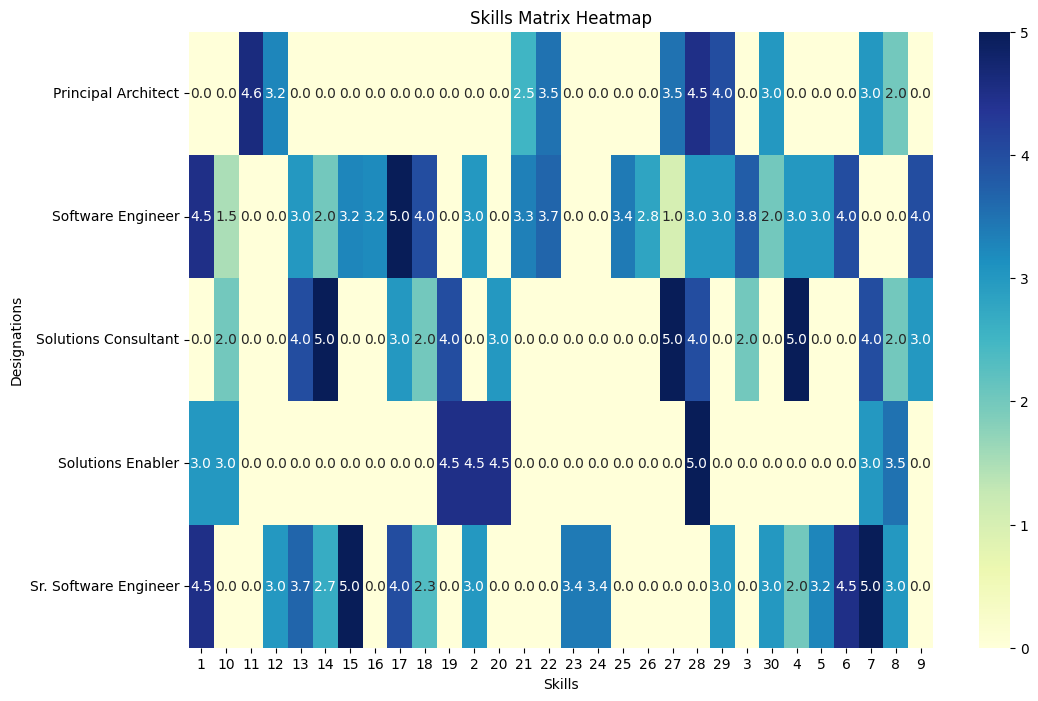

In [66]:
skills_expanded = data.pivot_table(index='predicted_designation', columns='skillID', values='proficiency', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(skills_expanded, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Skills Matrix Heatmap')
plt.xlabel('Skills')
plt.ylabel('Designations')
plt.show()

In [68]:
# Create the pivot table
skills_expanded = data.pivot_table(index='predicted_designation', columns='skillID', values='proficiency', fill_value=0)

# Convert column names to integers
skills_expanded.columns = skills_expanded.columns.astype(int)

# Map skillIDs to skill names
skills_map = skills.set_index('skillID')['skillName'].to_dict()
skills_expanded.columns = [skills_map[id] for id in skills_expanded.columns]

# Optionally normalize, add averages, and remove zero columns
skills_expanded = skills_expanded.div(skills_expanded.sum(axis=1), axis=0)
skills_expanded.loc['Average'] = skills_expanded.mean()
skills_expanded = skills_expanded.loc[:, (skills_expanded != 0).any(axis=0)]


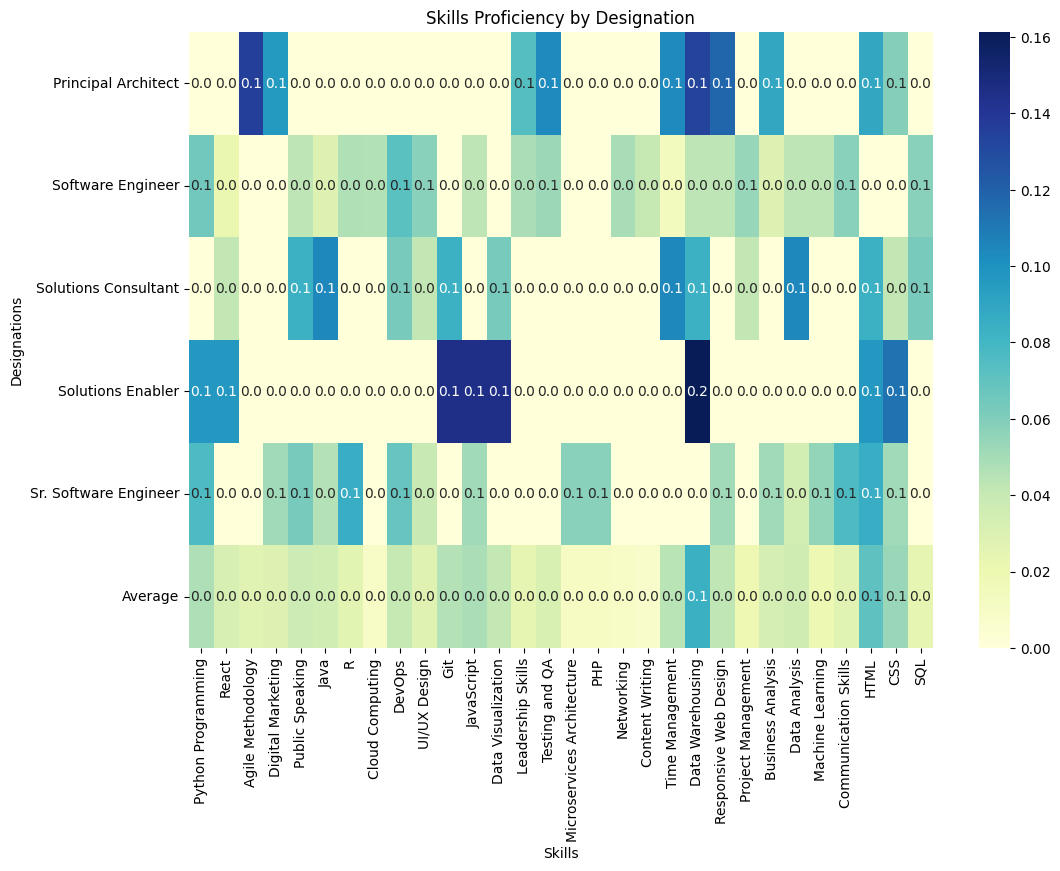

In [69]:
plt.figure(figsize=(12, 8))
sns.heatmap(skills_expanded, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Skills Proficiency by Designation')
plt.xlabel('Skills')
plt.ylabel('Designations')
plt.show()

SKILL ANALYSIS

In [74]:
# Calculate average proficiency for each skill
average_proficiency = skills_expanded.mean().sort_values(ascending=False)

# Display the top 10 skills
print("Top 10 Skills by Average Proficiency:")
print(average_proficiency.head(10))

# Display the bottom 10 skills
print("\nBottom 10 Skills by Average Proficiency:")
print(average_proficiency.tail(10))


Top 10 Skills by Average Proficiency:
Data Warehousing         0.084158
HTML                     0.070778
CSS                      0.052949
JavaScript               0.047896
Python Programming       0.047651
Git                      0.045699
Time Management          0.044395
Responsive Web Design    0.042498
Data Visualization       0.041532
DevOps                   0.040534
dtype: float64

Bottom 10 Skills by Average Proficiency:
R                             0.026397
Leadership Skills             0.024377
SQL                           0.024027
Machine Learning              0.019716
Project Management            0.019140
PHP                           0.011581
Microservices Architecture    0.011581
Networking                    0.009798
Cloud Computing               0.009222
Content Writing               0.008069
dtype: float64


STATISTICAL ANALYSIS

In [75]:
# Identify top skills for each designation
top_skills_per_designation = skills_expanded.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

print("\nTop Skills by Designation:")
print(top_skills_per_designation)



Top Skills by Designation:
predicted_designation
Principal Architect      [Agile Methodology, Data Warehousing, Responsi...
Software Engineer               [DevOps, Python Programming, UI/UX Design]
Solutions Consultant                [Java, Time Management, Data Analysis]
Solutions Enabler                      [Data Warehousing, Git, JavaScript]
Sr. Software Engineer                        [R, HTML, Python Programming]
Average                                      [Data Warehousing, HTML, CSS]
dtype: object


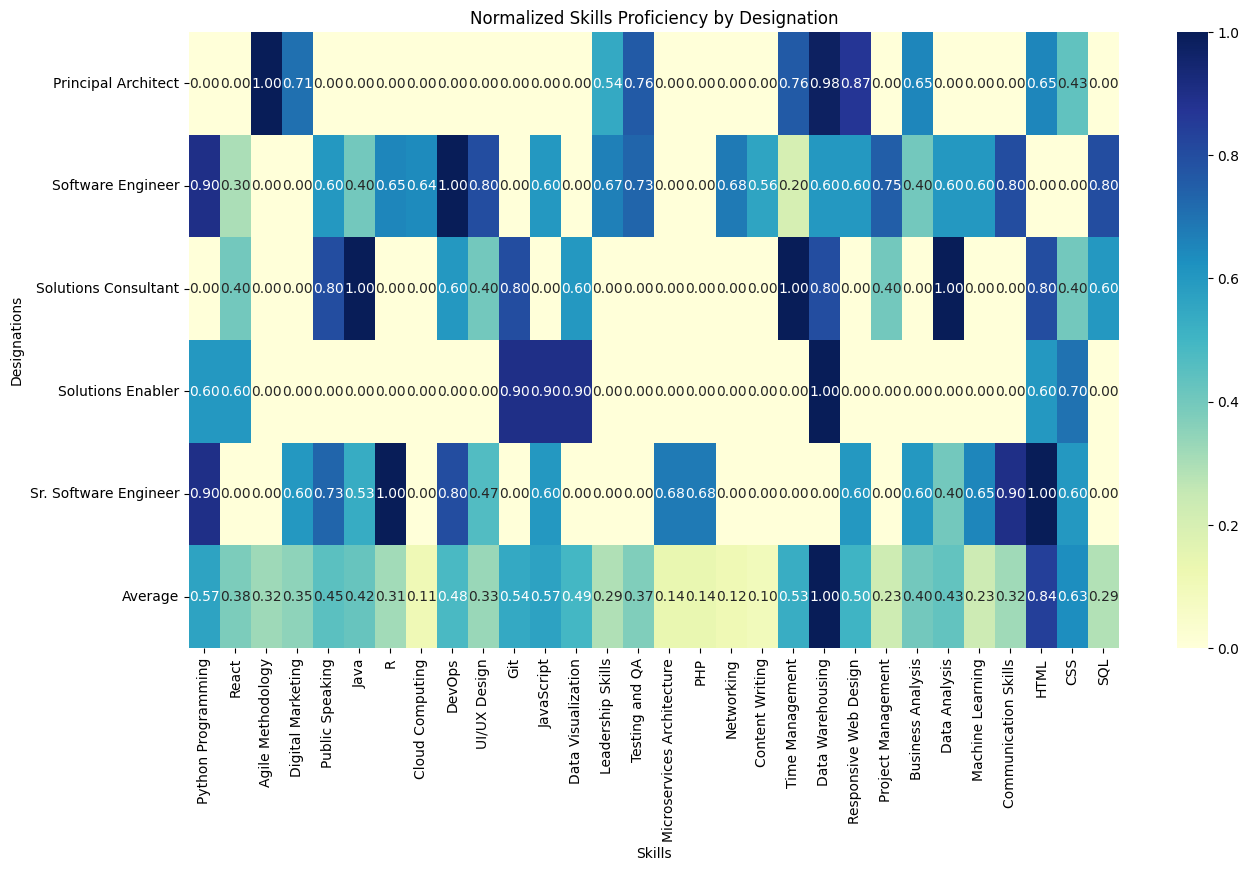

In [77]:
# Normalize the proficiency scores
skills_expanded_normalized = skills_expanded.div(skills_expanded.max(axis=1), axis=0)

# Visualize the normalized heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(skills_expanded_normalized, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Normalized Skills Proficiency by Designation')
plt.xlabel('Skills')
plt.ylabel('Designations')
plt.show()


In [78]:
skills_expanded.to_csv('skills_proficiency_by_designation.csv')
skills_expanded_normalized.to_csv('normalized_skills_proficiency_by_designation.csv')



In [80]:
df=pd.read_csv('skills_proficiency_by_designation.csv')
df

,predicted_designation,Python Programming,React,Agile Methodology,Digital Marketing,Public Speaking,Java,R,Cloud Computing,DevOps,...,Data Warehousing,Responsive Web Design,Project Management,Business Analysis,Data Analysis,Machine Learning,Communication Skills,HTML,CSS,SQL
0,Principal Architect,0.000000,0.000000,0.135894,0.096012,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.132939,0.118168,0.000000,0.088626,0.000000,0.000000,0.000000,0.088626,0.059084,0.000000
1,Software Engineer,0.064841,0.021614,0.000000,0.000000,0.043228,0.028818,0.046830,0.046110,0.072046,...,0.043228,0.043228,0.054035,0.028818,0.043228,0.043228,0.057637,0.000000,0.000000,0.057637
2,Solutions Consultant,0.000000,0.041667,0.000000,0.000000,0.083333,0.104167,0.000000,0.000000,0.062500,...,0.083333,0.000000,0.041667,0.000000,0.104167,0.000000,0.000000,0.083333,0.041667,0.062500
3,Solutions Enabler,0.096774,0.096774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.161290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096774,0.112903,0.000000
4,Sr. Software Engineer,0.076639,0.000000,0.000000,0.051093,0.062447,0.045416,0.085155,0.000000,0.068124,...,0.000000,0.051093,0.000000,0.051093,0.034062,0.055351,0.076639,0.085155,0.051093,0.000000
5,Average,0.047651,0.032011,0.027179,0.029421,0.037802,0.035680,0.026397,0.009222,0.040534,...,0.084158,0.042498,0.019140,0.033708,0.036291,0.019716,0.026855,0.070778,0.052949,0.024027
